# Host concentration bins

In [12]:
cc = cc_SV0
sh = sh_SV0
centrals_mask = centrals_mask_SV0
Mvar = 'M'
M1, M2 = 10**12.0, 10**13.0#10**12.5, 10**12.8

fht_fof = real_fof_tags(cc['fof_halo_tag'])
assert np.array_equal(fht_fof, cc['fof_halo_tag'])

fof_cores, idx_un = np.unique( fht_fof[centrals_mask&(M1 <= cc[Mvar])&(cc[Mvar] <= M2)], return_index=True )
idx_centrals = np.flatnonzero( centrals_mask&(M1 <= cc[Mvar])&(cc[Mvar] <= M2) )[idx_un]
nH_cores = len(fof_cores)

In [13]:
assert nH_cores == len(fht_fof[centrals_mask&(M1 <= cc[Mvar])&(cc[Mvar] <= M2)])

In [14]:
print('nH_cores\t', nH_cores)
print('nH_cores in sh\t', np.isin(fof_cores, sh['fof_halo_tag']).sum())

nH_cores	 54914
nH_cores in sh	 53890


In [15]:
print(len(np.unique( sh['fof_halo_tag'][(M1 <= sh[Mvar])&(sh[Mvar] <= M2)] )))
np.isin(np.unique( sh['fof_halo_tag'][(M1 <= sh[Mvar])&(sh[Mvar] <= M2)] ), cc['fof_halo_tag']).sum()

54914


53890

In [263]:
assert np.array_equal(fof_cores, cc['fof_halo_tag'][idx_centrals])
assert nH_cores==np.sum(centrals_mask&(M1 <= cc[Mvar])&(cc[Mvar] <= M2))

In [264]:
print('c<0:\t', (cc['infall_sod_halo_cdelta'][idx_centrals]<0).sum())
print('c==0:\t', (cc['infall_sod_halo_cdelta'][idx_centrals]==0).sum())
print('c==-1:\t', (cc['infall_sod_halo_cdelta'][idx_centrals]==-1).sum())
print('c==-101:', (cc['infall_sod_halo_cdelta'][idx_centrals]==-101).sum())

c<0:	 799
c==0:	 0
c==-1:	 766
c==-101: 0


In [265]:
# only get halos which are in sh catalog AND which have a nonnegative concentration
idx_centrals = idx_centrals[np.isin(fof_cores, sh['fof_halo_tag'])&(cc['infall_sod_halo_cdelta'][idx_centrals]>=0)]
print(f'Host fof halos in mass bin that are in sh catalog and have c>=0: {len(idx_centrals)/nH_cores*100}%')
nH_cores = len(idx_centrals)
print('nH_cores, sh\t', nH_cores)

Host fof halos in mass bin that are in sh catalog and have c>=0: 96.71122118221218%
nH_cores, sh	 53108


In [266]:
half1_mask = cc['infall_sod_halo_cdelta'][idx_centrals]<=np.median(cc['infall_sod_halo_cdelta'][idx_centrals])
h1 = cc['fof_halo_tag'][idx_centrals][half1_mask]
h2 = cc['fof_halo_tag'][idx_centrals][~half1_mask]

Med_cdelta = np.median(cc['infall_sod_halo_cdelta'][idx_centrals])
print('Med(cdelta)', Med_cdelta)
print('range(cdelta)', np.min(cc['infall_sod_halo_cdelta'][idx_centrals]), np.max(cc['infall_sod_halo_cdelta'][idx_centrals]))

Med(cdelta) 6.9317045
range(cdelta) 0.003244264 49.936092


In [267]:
print('c<0:\t', (cc['infall_sod_halo_cdelta'][idx_centrals]<0).sum())
print('c==0:\t', (cc['infall_sod_halo_cdelta'][idx_centrals]==0).sum())

c<0:	 0
c==0:	 0


In [268]:
#### figure out what -101 (fof p count <500), -1(sod part. count too low), -x (throw out) means
np.unique(cc['infall_sod_halo_cdelta'][centrals_mask], return_counts=True)

(array([-101.       ,   -1.       ,   -0.5039451, ...,   43.977493 ,
          46.8622   ,   49.936092 ], dtype=float32),
 array([1694826,   12925,       1, ...,       1,       1,       1]))

In [269]:
np.unique(cc['infall_sod_halo_cdelta'][idx_centrals], return_counts=True)

(array([3.2442641e-03, 5.7812827e-03, 1.8318620e-02, ..., 4.3104954e+01,
        4.3977493e+01, 4.9936092e+01], dtype=float32),
 array([1, 1, 1, ..., 1, 1, 1]))

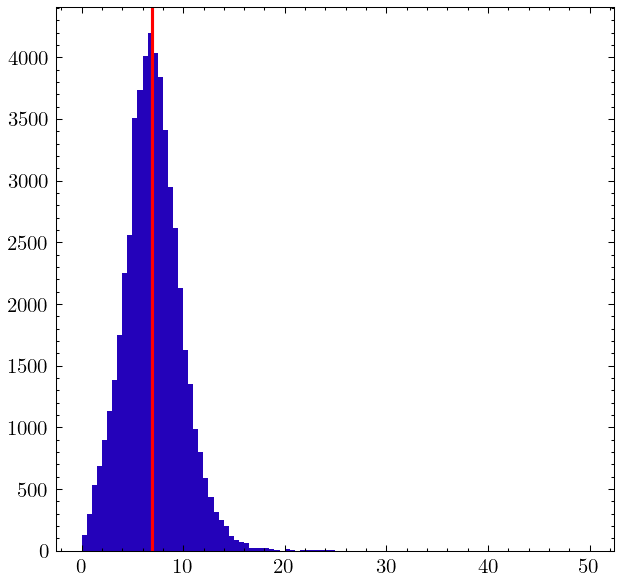

In [270]:
plt.hist(cc['infall_sod_halo_cdelta'][idx_centrals], 100)
plt.axvline(np.median(cc['infall_sod_halo_cdelta'][idx_centrals]), c='r')

nH_h, sh	 26554
nH_h, sh	 26554
xlim (11.06285228729248, 12.65367374420166)


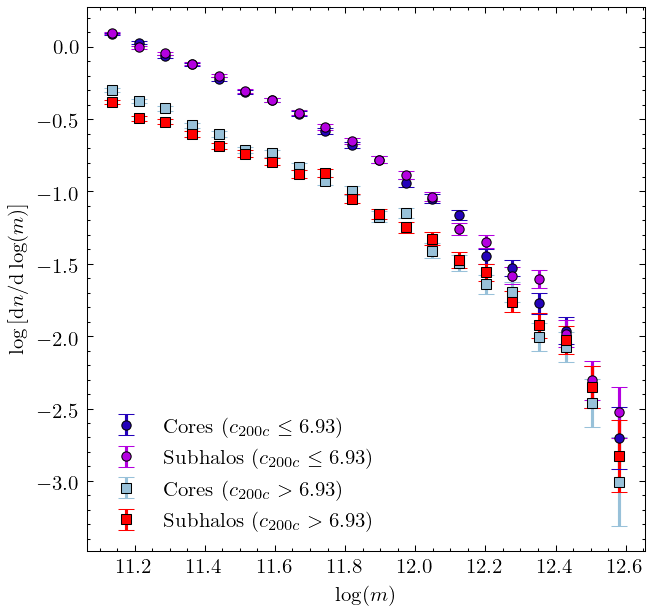

In [273]:
concentration_plot(cc, centrals_mask, sh, h1, h2, Med_cdelta)
# plt.savefig('Paper2Figs/concentration_12.0_13.0_SV_z0_newlegendlabels.pdf')